The script clusters recipes using features like nutritional info, ingredients, dietary preferences, and health goals, it combines multiple feature versus takign each one individualy.  It applies PCA for dimensionality reduction, identifies optimal cluster numbers using the Elbow Method and silhouette scores, and finally assigns recipes to clusters. The outcomes include visualizations of the clustering process and a listing of recipes by cluster.

/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

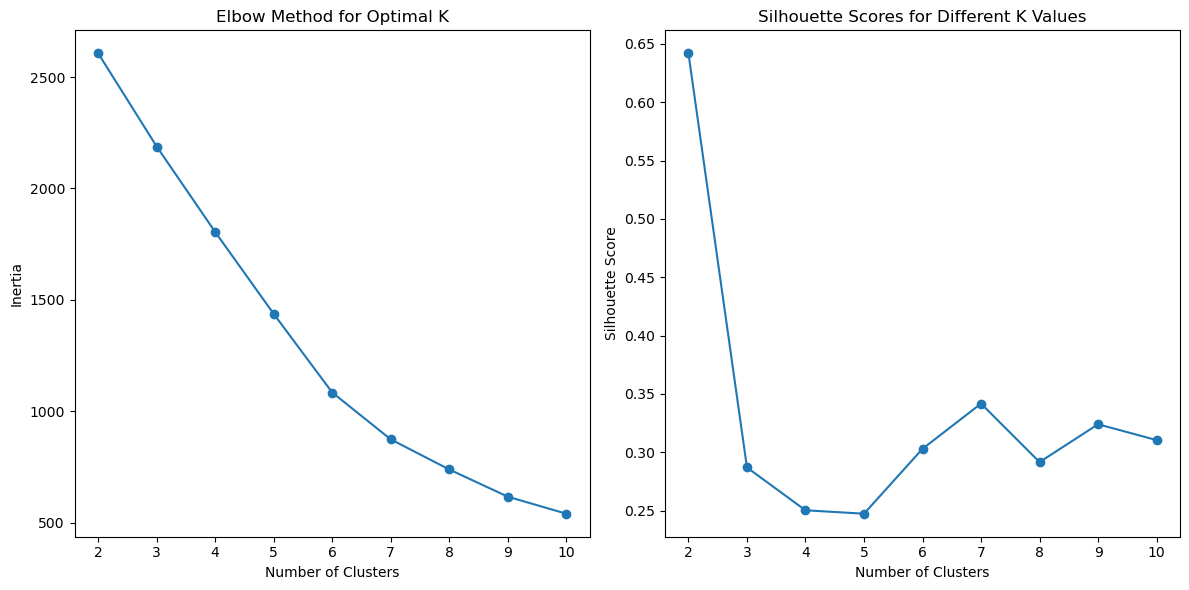

/Users/ibnatchoudkhuri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


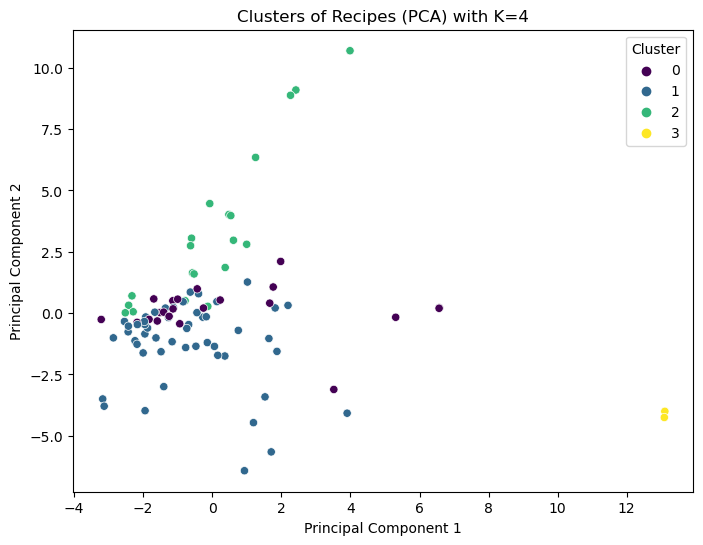

Recipes in each cluster:
 Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Recipe
       0                                                                                                  

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import ast  

# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Preprocess 'Ingredient' column
data['Ingredient'] = data['Ingredient'].apply(ast.literal_eval)  # Convert Ingredient lists from string to list
ingredients_encoded = data['Ingredient'].str.join('|').str.get_dummies()  # Note the change here if you have list of ingredients
dietary_encoded = data['Dietary Preference'].str.get_dummies()
health_goals_encoded = data['Health Goals'].str.get_dummies()

# Encode 'Recipe Category' and 'Recipe Difficulty'
recipe_category_encoded = data['Recipe Category'].str.get_dummies()
recipe_difficulty_encoded = data['Recipe Difficulty'].str.get_dummies()

# Combine all features
features_combined = pd.concat([
    data[['Calories', 'Carbohydrates', 'Proteins']],
    ingredients_encoded,
    dietary_encoded,
    health_goals_encoded,
    recipe_category_encoded,  # Include the newly encoded features
    recipe_difficulty_encoded
], axis=1)

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_combined)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # Adjust based on explained variance
features_pca = pca.fit_transform(features_scaled)

# Determine the optimal number of clusters using the Elbow Method and silhouette analysis
inertia = []
silhouette_scores = []
max_clusters = 10
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_pca, labels))

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.tight_layout()
plt.show()

# Select the optimal number of clusters
optimal_k = 4  # Adjust based on the silhouette score analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(features_pca)

# Update the dataset with the cluster assignments
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title(f'Clusters of Recipes (PCA) with K={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Group the recipes by cluster and list them
clustered_recipes = data.groupby('Cluster')['Recipe'].apply(list).reset_index()

# Display the table of Recipes in Each Cluster
print("Recipes in each cluster:")
print(clustered_recipes.to_string(index=False))
